DSF4-NB-1, Statistics with Python, 2020-06-11, S. Haug, University of Bern. 


# Statistics with Python


This one day course introduces basic statistical concepts used in Data Science with Python. It is more "how do I use this concept in Python" than "what is this concept". Some familiarity with statistical concepts are assumed.

**Learning Objectives**

Participants can/do
- understand probability and know typical distributions
- understand the meaning of common characteristics and uncertainties (standard deviations, sigmas, p-values, confidence levels, ...)
- apply linear regression for parameter estimation 
- pply statistical tests
- Interpret and present results from statistical data analysis 

**Methods**

The teaching languages are Python and English. The teaching methods include short theoretical introdcutions and example intersected with hands-on exercises. 

**Prerequisites**

- Equivalent to Data Science Fundamentals 1-3
- Experience with Jupyter notebooks
- Working in Jupyter notebook environment
- Statistics fundamentals preferred
- Basic programming skills are necessary, we don't reserve time for basic programming concepts.



#### Python References

- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
- https://docs.scipy.org/doc/scipy/reference/
- https://matplotlib.org/users/index.html

### Schedule

09:00 - 11:30 Course <br> 
10:30 - 11:00 Break<br>
11:00 - 12:30 Course<br>
12:30 - 13:30 Lunch<br>
13:30 - 15:00 Course<br>
15:00 - 15:30 Break<br>
15:30 - 17:00 Course<br>

## Content

0.0 Our playground - the Iris Dataset and SciPy<br>
<br>
1.0 Random variables and pdfs<br>
1.1 Normal pdf<br>
1.2 Poisson pdf<br>
1.3 Binomial pdf<br>
1.4 Iris pdfs<br>
1.5 Generating pdfs<br>
1.6 p-Values, Significance, Confidence Levels/Intervals<br>
1.7 Uncertainties<br>
1.8 Recapitulation<br>
<br>
2.0 Describing Data with pdfs<br>
2.1 Moments<br>
2.2 Quantiles, Median and Mode
2.3 Standard Error
2.4 p-Value
2.5 Interpretation of Errors/Uncertainties
2.6 Descriptive Statistics with Python (numbers and graphs) 
2.7 Recapitulation<br>
<br>
3.0 Regression<br>
4.0 Hypothesis Testing<br>
4.1 Confidence Levels<br>


## 0. Our Playground - the Iris Dataset and SciPy

When doing (Data) Science with Python, we use data and Python modules typically from the SciPy ecosystem (www.scipy.org). In this training we use the Iris dataset and the follwing SciPy modules.

- NumPy (for efficient/fast processing of large datasets)
- Pandas (for convenient data handling)
- SciPy (including the statistical module)
- Mathplotlib (and possibly Seaborn) for visualisation

Other packages like TensorFlow may not be part of SciPy, however, also much used.


### Load the needed modules

In [5]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
print('Congrats, you just loaded numpy, scipy.stats and mathplot.pyplot loaded !')

Congrats, you just loaded numpy, scipy.stats and mathplot.pyplot loaded !


### Load the Iris dataset (5 min)

In [7]:
# Load the Iris dataset into a dataframe an study the dataframe content
import pandas as pd
url = 'https://www.openml.org/data/get_csv/61/dataset_61_iris.arff'
dataframe = pd.read_csv(url) #,names=['slength','swidth','plength','pwidth','name'])
dataframe.head()
dataframe[48:52]
dataframe[98:102]


,sepallength,sepalwidth,petallength,petalwidth,class
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


What are the numbers in the table, which unit do they have?

## 1.0 Random variables and probability density functions (pdf)

In practice the measurement process, the data taking, is a **random, or stochastic, process**. The outcome varies from measurement to measurement. There are three (at least) reasons:

- Measurements are normally on a sample, not the full population. Samples fluctuate.
- Sensors have limited resolution, measurements on the same sample vary within the resolution 
- According to quantum mechanics, i.e. at smallest distances, measurements are by nature stochastic

Our Iris dataset is a sample from 50 flowers in each class. So in each class there are 50 varying measurements for each of the four observables, sepal and petal length and width. This is due to the first and maybe the second reason (quantum mechanics can be neclected at scales larger than molecules). In descriptive statistics the observables are therefore called **random** variables. Let us call one x for examplification.

If x can take on any value from a continuous range, we write $f(x;\theta)dx$ as the probability that the measurement’s outcome lies between x and $x + dx$. The function $f (x; \theta)$ is called the **probability density function (p.d.f.)**, which may depend on one or more parameters $\theta$ (for example the Iris class).

A random variable can be discrete or continuous. If discrete, then we use $f(x;\theta)$ to denote the probability to find the value x (in python the term probability mass fundtion, pmf, is then used). In the following the term p.d.f. is often taken to cover both the continuous and discrete cases, although technically the term density should only be used in the continuous case.

The p.d.f. is always normalized to **unity** (the number 1), i.e. the integral, i.e. the surface under the curve equals one. Both x and $\theta$ may have multiple components and are then often written as vectors. If $\theta$ is unknown, we may wish to estimate its value from a given set of measurements of x; this is a central topic of statistics (see next notebook on parameter estimation and regression).

The p.d.f. should be chosen to describe the fluctuation of the random variable in a best possible way. In other words, we should always choose an approprate p.d.f to describe our data. Some very useful and much used p.d.f. follow. 

### 1.1 The normal pdf.

The normal (or Gaussian) probability density function is probably the most used one (informally the "bell curve"). It 
derives its importance in large part from the *central limit theorem*: "In most situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed." https://en.wikipedia.org/wiki/Central_limit_theorem 

**Example:** If one flips a coin many times the probability of getting a given number of heads in a series of flips will approach a normal curve, with mean equal to half the total number of flips in each series. (In the limit of an infinite number of flips, it will equal a normal curve.)

This means that in many or most cases it is sufficient to know the characteristics of the normal p.d.f. Others can be looked up if needed. Also often unspecified statements like the *error*, or better, the *uncertainty* refer to their meaning on the normal p.d.f.

As a formula the normal distribution function looks like (in one dimension)

$$ f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp(\frac{-(x-\mu)^2}{2\sigma^2}) $$

It reads, given the distribution parameters mean $\mu$ and standard deviation $\sigma$, x follows this function.

### Exercise 1.1 Plot the "analytical" Normal p.d.f (5 min)

Plot the normal distribution with mean 0 and standard deviation 5 for 400 x values between -20 to 20. Repeat this for two other means and standard deviations. How big is the surface under the curves ?

(See also scipy.stat.norm https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html)  


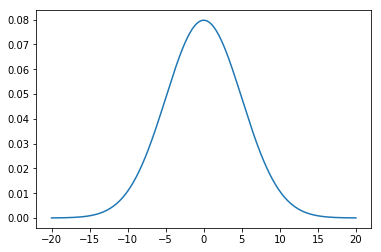

In [10]:
scipy.stats.norm.pdf(-5.,0,5)
scipy.stats.norm.cdf(0,0,5)
# Part of the solution:
x = np.linspace(-20,20,400) # 400 bins from -20 to 20
plt.plot(x, scipy.stats.norm.pdf(x,0,5))

### 1.2 The Poisson pdf

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. For example:

- The number of meteorites greater than 1 meter diameter that strike Earth in a year
- The number of patients arriving in an emergency room between 10 and 11 pm

The probability mass function is $$f(k;\lambda) = \frac{\lambda^k exp(-\lambda)}{k!}$$
For large k the normal distribution is an excellent approximation of the poisson p.d.f. For k below 20 one should be careful using statements based on the normal distribution.

The standard deviation of the Poisson pdf is simply $\sqrt{\lambda}$. This is very convenient, in particular for higher $\lambda$ where the normal pdf is a good approximation and the probabilistic interpretation is easy (see below).

**Plot the Poisson**

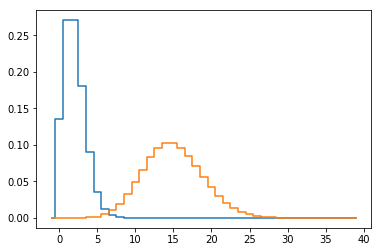

In [11]:
x = np.arange(-1, 40)
plt.plot(x,scipy.stats.poisson.pmf(x,2),drawstyle='steps-mid')
plt.plot(x,scipy.stats.poisson.pmf(x,15),drawstyle='steps-mid')

### 1.3 The Binomial PDF

The binomial pdf models the probability of getting k positives when drawing n times, each time asking positive or false. For example,   

$$f(k;n,p) = \binom{n}{k} \cdot p^kq^{n-k}$$

The binomial distribution converges towards the Poisson distribution as the number of trials goes to infinity while the product np remains fixed or at least p tends to zero. Therefore, the Poisson distribution with parameter λ = np can be used as an approximation to B(n, p) of the binomial distribution if n is sufficiently large and p is sufficiently small. According to two rules of thumb, this approximation is good if n ≥ 20 and p ≤ 0.05, or if n ≥ 100 and np ≤ 10.

For n>20 and p not too close to 1 or 0, the normal distribution is also here a good approximation. 

**Plot the binomial pdf for various parameters**

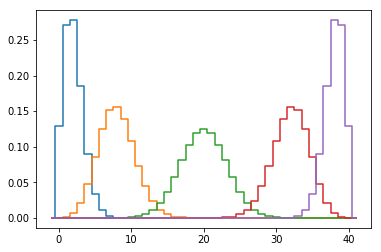

In [13]:
x = np.arange(-1,42)
plt.plot(x,scipy.stats.binom.pmf(x,40,0.05),drawstyle='steps-mid')
plt.plot(x,scipy.stats.binom.pmf(x,40,0.2),drawstyle='steps-mid')
plt.plot(x,scipy.stats.binom.pmf(x,40,0.5),drawstyle='steps-mid')
plt.plot(x,scipy.stats.binom.pmf(x,40,0.8),drawstyle='steps-mid')
plt.plot(x,scipy.stats.binom.pmf(x,40,0.95),drawstyle='steps-mid')

### 1.4 The Iris PDF

We can now plot the columns of the Iris dataset and ask ourself if the pdf is Normal, Poisson or Binomial, i.e. what is a good pdf model for our data? 

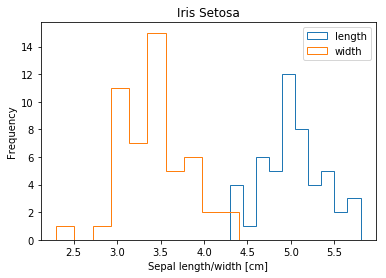

In [14]:
df_setosa = dataframe[dataframe['class']=='Iris-setosa']
df_setosa['sepallength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa', label="length")
ax = df_setosa['sepalwidth'].plot(kind="hist",fill=False,histtype='step', label="width")
ax.set_xlabel('Sepal length/width [cm]')
ax.set_ylabel('Frequency')
plt.legend()

### 1.5 Generating PDF with Python

One can simulate data sets by generating them from probability density functions. The computer does this with a so called Monte Carlo (MC) algorithm. It draws x values (pseudo) randomly from the given distribution. The the actual draws of the random variable are called random variates. Simulations can be very useful when planning an experiment and developing the analysis method. Instead of real data one can use the simulated data. 

Generate a normal dataset with 100 values, following a normal distribution.

(array([  1.,   8.,  39., 103., 231., 229., 235., 112.,  33.,   9.]),
 array([2.22992886, 2.44455027, 2.65917168, 2.87379309, 3.0884145 ,
        3.30303591, 3.51765732, 3.73227873, 3.94690014, 4.16152155,
        4.37614296]),
 <a list of 10 Patch objects>)

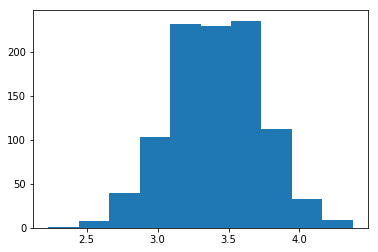

In [15]:
n = scipy.stats.norm.rvs(3.418,0.318,1000) # 1000 random values from a normal distribution with mean 3.418 and SD 0.318
plt.hist(n)

### 1.6 p-Value, Significance, Confidence Level and Interval

The p-value of a (measured) value is the surface (integral) under the pdf above that value, i.e. the probability of getting such a value or higher. Thus, the p-value is a measure for significance. Most implementations of statistical tests return the p-value and the value of the test statistic.

In [16]:
## The p-value of 3 on a normal pdf with mean of 2 and SD of 5
print('p-value = %1.2f'%scipy.stats.norm.cdf(3,2,5))

p-value = 0.58


In [19]:
## The p-value of measuring a setosa slength longer than 5.2
df_above=df_setosa[df_setosa['sepallength']>5.2]
p = df_above['sepallength'].sum()/df_setosa.sum()[0]
print('p-value = %1.2f'% p)

p-value = 0.24


Some times one refers to "double sided" p-values, i.e. what is the probability of obtaining a value outside $x\pm\Delta{x}$. If so, this needs to be taken into account when calculating the probability.

Which significance is considered as **significant** is a matter of convention. Some fields consider a p-value below 0.05 as significant. 0.05 is then the **significance level** $\alpha$.

Very often only the number of standard deviations and not the actual p-value is reported. If so, one has to assume a normal pdf where standard deviations have commonly known p-values, i.e. probabilities.

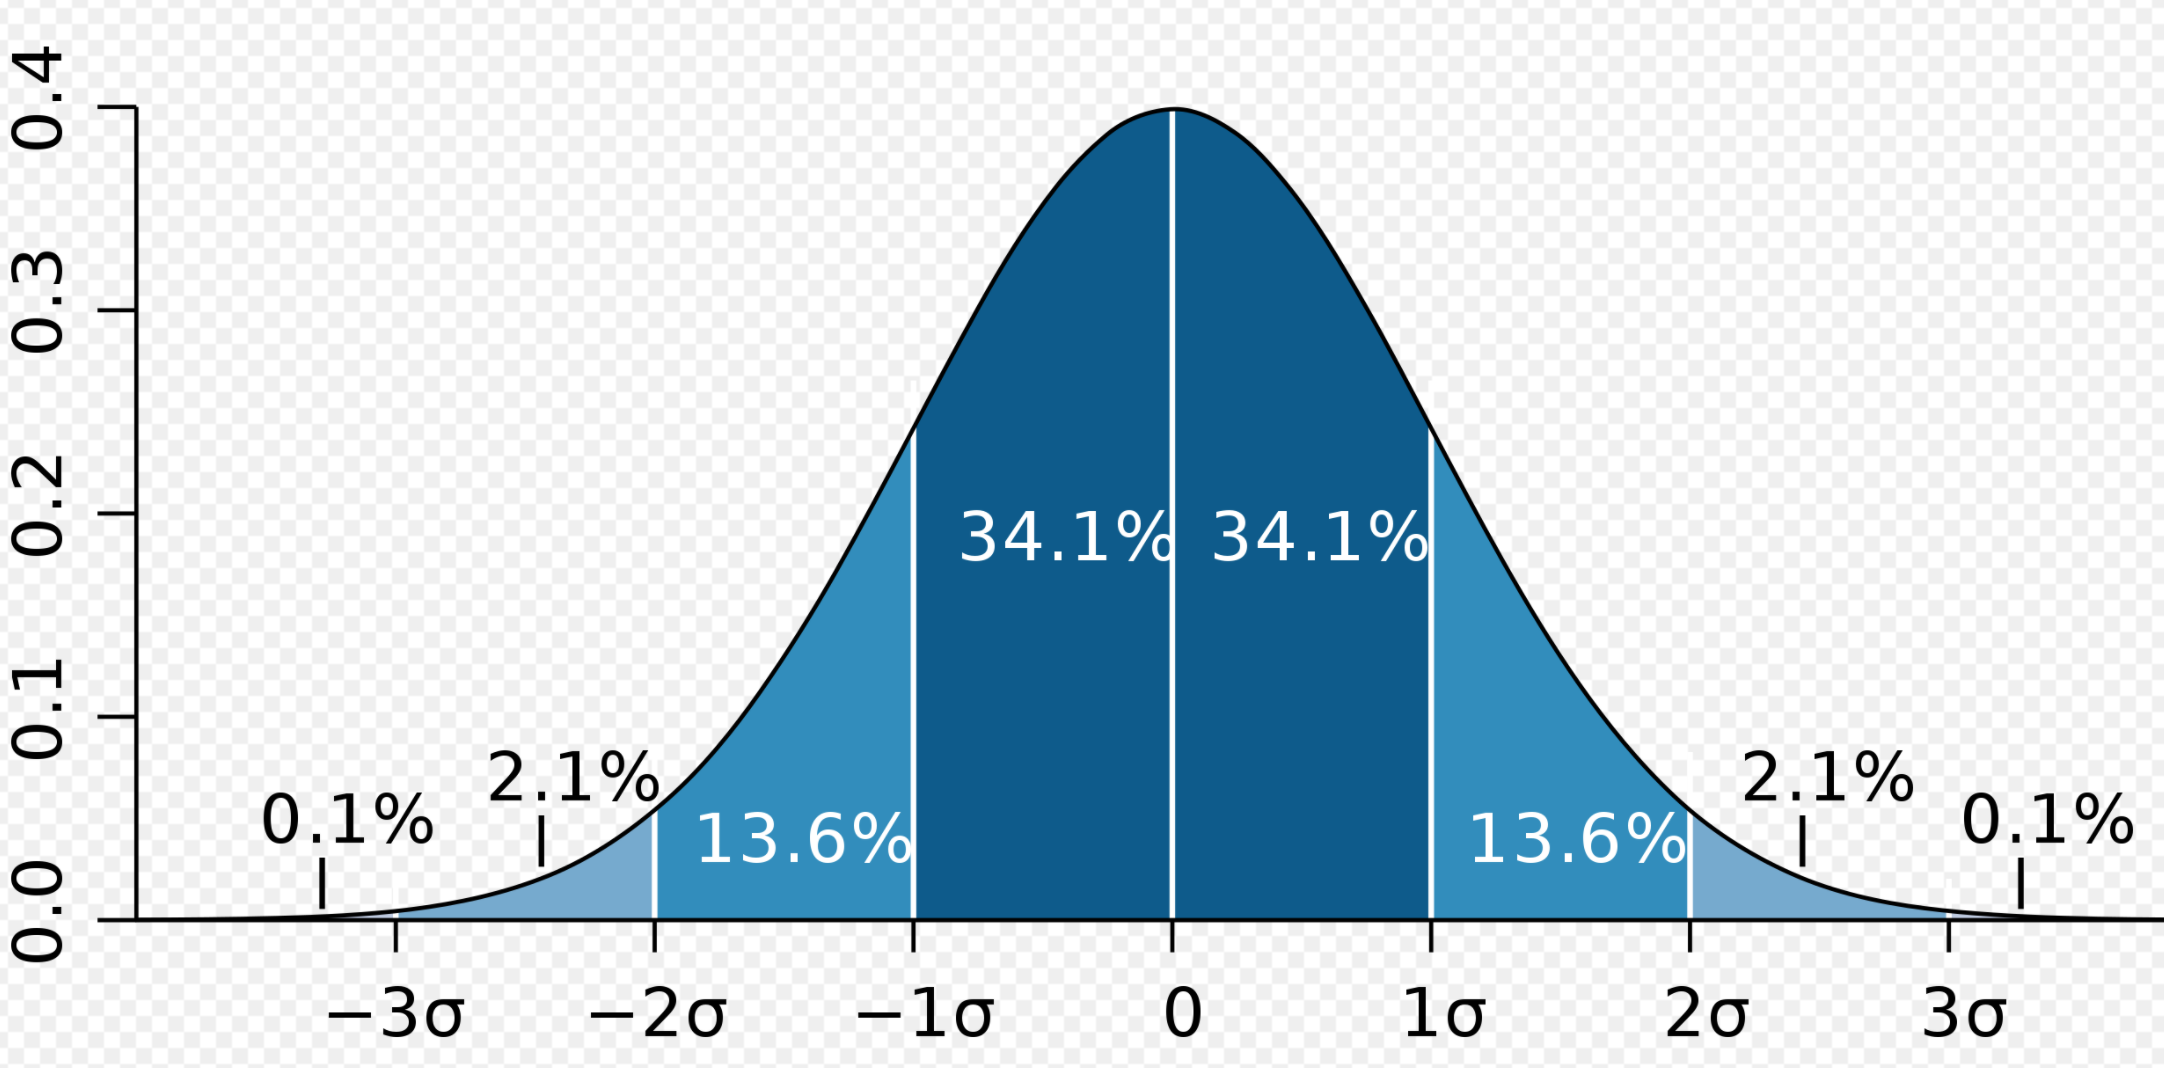

Example: People showing up in the emergancy room of a hospital on Fridays is reported as $$N_{Friday} = 81\pm \Delta{9}$$
Our interpretation is then, assuming that 81 is the true mean, 31.8% of all Fridays will have more than 90 or less than 72 people showing up. If the actual pdf is not normal, this interpretation is wrong. However, maybe good enough.

In this case $\Delta 9$ is a **confidence interval** with a confidence level of 68.2%.

### 2.7 Uncertainties

All data have uncertainties. These should always be communicated when showing scientific numbers or plots. We distinguish between two types.

- Statistical uncertainties 
    - Fluctuations, can be made smaller by taking more data, i.e. get more statistics
- Systematic uncertainties 
    - Shift of data in one direction due to some "mistake" in the measurement, e.g. wrongly calibrated instrument showing all measured values systematically higher as they really are. Or for instance uncertainty due to the choice of methods and tools
    
The statistics tools can mostly handle the statistical uncertainties. There is no mathematical recipe for dealing with systematical uncertainties. You have to think through your experiment and try to estimate the influence of everything that can go wrong.

When uncertainties are stated on numbers or in graphs as error bars or error bands they generally show one standard deviation. If the data are well described by a normal p.d.f, the interpretation of one standard deviation is clear: if the measurement is repeated many times, 32% (or about 1/3 of the measurements) **should** be outside the error bars. 


### 1.8 Recapitulation

- Collected data almost always contain random variables. Why?
- Random variables can be modelled with PDFs.
- There are many PDFs (infinite). What is the most important PDF?
- Can you give by heart p-values for different standard deviations on the normal PDF?

A table with some other common PDFs is attached to this notebook.


## 2.0 Describing the data with descriptive statistics

Statistics is a branch of mathematics dealing with the collection, analysis, interpretation, presentation, and organization of data. Two main statistical methods are used in data analysis: descriptive statistics, which summarize data from a sample using indexes such as the mean or standard deviation (see moments), and inferential statistics, which draw conclusions from data that are subject to random variation (e.g. observational errors, sampling variation).


### 2.1 Moments of the p.d.f. (mean, variance, standard deviation)

The $n^{th}$ moment of a random variable x with p.d.f. $f(x)$ is
$$ \alpha_n \equiv E[x^n] = \int_{-\infty}^{\infty} x^nf(x)dx   $$
In the discrete case for $n=1$ this integral becomes the sum known as the arithemtic mean:
$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i$$

<!--
and the $n^{th}$ central moment of x (or moment about the mean, $α_1$) is

$$ m_n \equiv E[(x-\alpha_1)^n] = \int_{-\infty}^{\infty} (x-\alpha_1)^nf(x)dx   $$
-->

The most commonly used moments are the **mean $\mu$ (or expectation value) and variance $\sigma^2$**:

$$\mu \equiv \alpha_1 $$
$$\sigma^2 \equiv V[x] \equiv \int_{-\infty}^{\infty} (x-\mu)^2 f(x)dx = ... = \alpha_2 - \mu^2 $$

The mean is the location or the “center of mass” of the p.d.f., and the variance is a measure of the square of its width. It is often convenient to use the **standard deviation (SD)** of $x$, $\sigma$, defined as the square root of the variance. In the discrete case the variance becomes
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$

For the normal p.d.f the standard deviation is its width. 

Based on higher moments other distribution descriptors are formed. **Skewness** and **Kurtosis** you may encounter. The skewness is a number indicating the deviation from a symmetric form. Kurtosis is a number indicating if the tails of the distribution is larger or smaller then the tails of the normal distribution.


In [20]:
m,v,s,k = scipy.stats.norm.stats(10,5,moments='mvsk')
print(m,v**0,5,s,k)

10.0 1.0 5 0.0 0.0


In [23]:
df_setosa.describe()
print('%1.2f %1.2f %1.2f %1.2f' % (df_setosa['sepallength'].mean(),df_setosa['sepallength'].std(),df_setosa['sepallength'].skew(),df_setosa['sepallength'].kurt()))

5.01 0.35 0.12 -0.25


### 2.2 Quantiles, median and mode

The **quantile $x_{\alpha}$** is the value of the random variable x at which $\alpha$% of the area is below x. An important special case is the **median, $x_{med} \equiv x_{50}$**. At the median half the area lies above and half lies below. 
For the normal p.d.f. the median equals the mean. The most probable value of a distribution is called **mode**. 

Special quantiles are the quartiles and percentiles. The first quartile is the $x_{25}$, the second the $x_{50}$ etc. Percentiles are for example $x_{13}$ etc. 

<!--
Any odd moment about the mean is a measure of the **skewness** of the p.d.f. The simplest of these is the dimensionless coefficient of skewness $\gamma_1 = m_33/\sigma^3$.

The fourth central moment $m_4$ provides a convenient measure of the tails of a distribution. For the Gaussian distribution, one has $m_4 = 3\sigma^4$. The **kurtosis** is defined as $\gamma_2 = m_4/\sigma^4 − 3$, i.e., it is zero for a Gaussian, positive for a leptokurtic distribution with longer tails, and negative for a platykurtic distribution with tails that die off more quickly than those of a Gaussian.

The **quantile $x_{\alpha}$** is the value of the random variable x at which the cumulative distribution is equal to $\alpha$. That is, the quantile is the inverse of the cumulative distribution function, i.e., $x_{alpha} = F^{−1}(\alpha)$. An important special case is the **median, $x_{med}$**, defined by $F(x_{med}) = 1/2$, i.e., half the probability lies above and half lies below $x_{med}$. (More rigorously, $x_{med}$ is a median if $P(x \geq x_{med}) \geq 1/2$ and $P(x \leq x_{med}) \geq 1/2$. If only one value exists, it is called ‘the median.’)

Under a monotonic change of variable $x \rightarrow y(x)$, the quantiles of a distribution (and hence also the median) obey $y_{\alpha} = y(x_{\alpha})$. In general the expectation value and **mode** (most probable value) of a distribution do not, however, transform in this way.

Let us look at median and quantile$_68$ of the normal pdf: 
-->

10.0
7.976530749411754


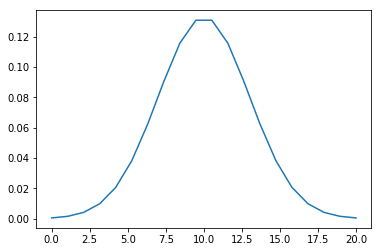

In [24]:
x = np.linspace(0,20,20)
print(scipy.stats.norm.ppf(0.5,10,3)) # Median = second quantile = x_{50} percentile
print(scipy.stats.norm.ppf(0.25,10,3)) # 
plt.plot(x,scipy.stats.norm.pdf(x,10,3))

### 2.3 Standard Error

The standard error or standard error mean is defined:
$$SE = \frac{\sigma}{\sqrt{n}}$$
where $\sigma$ is the sample mean and $n$ is the sample size. If you report SE and not SD, be sure you know the difference and be clear on what you report. 

In [25]:
print('Setosa sepal length mean %1.2f +- %1.2f'  % (df_setosa['sepallength'].mean(), df_setosa['sepallength'].std()))
print('Setosa sepal length mean %1.2f +- %1.2f'  % (df_setosa['sepallength'].mean(), df_setosa['sepallength'].sem()))
print(df_setosa['sepallength'].std()/df_setosa['sepallength'].size**0.5)

Setosa sepal length mean 5.01 +- 0.35
Setosa sepal length mean 5.01 +- 0.05
0.049849569625391305


### Get descriptive statistics from the normal pdf and plot (5 min)
https://docs.scipy.org/doc/scipy/reference/stats.html

Get some desciptive statistics from a normal (continous) p.d.f. with mean 0 and SD 4.

In [26]:
mean, variance, skewness, kurtosis = scipy.stats.norm.stats(0,4,moments='mvsk')
print(mean, variance, skewness, kurtosis)

0.0 16.0 0.0 0.0


Plot the p.d.f and some moments

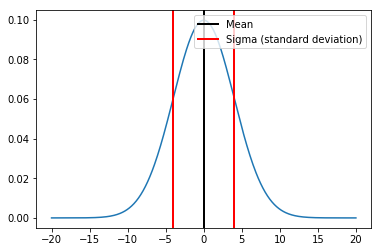

In [27]:
x = np.linspace(-20,20,400)
sigma=variance**0.5
plt.plot(x,scipy.stats.norm.pdf(x,mean,sigma))
plt.axvline(x=mean, linewidth=2, color = 'k',label="Mean") # Plot the mean as a vertical line
plt.axvline(x=mean-sigma, linewidth=2, color = 'r', label="Sigma (standard deviation)")
plt.axvline(x=mean+sigma, linewidth=2, color = 'r')
plt.legend(loc='upper right')

### Get descriptive statistics from the Iris dataset and plot (5 min)

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [28]:
df_setosa.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [29]:
df_setosa.sem()

sepallength    0.049850
sepalwidth     0.053885
petallength    0.024538
petalwidth     0.015162
dtype: float64

In [30]:
0.35249/(50)**0.5
df_setosa.skew()

sepallength    0.120087
sepalwidth     0.107053
petallength    0.071846
petalwidth     1.197243
dtype: float64

### 2.4 Descriptive Graphs
Python offers many ways for visually describing data. We'll look at some common ones.

**Histograms and binning**

Histograms are the common way to visually display the pdf of a data column. It consists of bins on the x axis containing the frequency/number of entries in each bin. The plotted result depends on the binning choice. It is important to be able to judge
- overbinning
- underbinning

Let's plot Iris Setosa length with various binnings. 

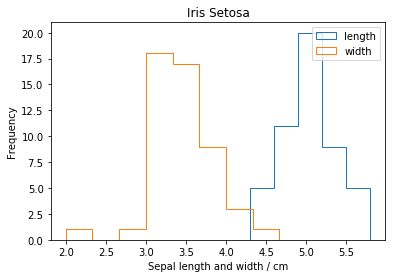

In [31]:
df_setosa = dataframe[dataframe['class']=='Iris-setosa']
df_setosa['sepallength'].plot(kind="hist",bins=5,fill=False,histtype='step',title='Iris Setosa', label="length")
# Test various number of bins in the next line
mybins=np.linspace(2,5,10)
ax = df_setosa['sepalwidth'].plot.hist(bins=mybins,fill=False,histtype='step', label="width")
ax.set_xlabel('Sepal length and width / cm')
ax.set_ylabel('Frequency')
plt.legend()

How do you choose the right binning?

**Histograms with error/uncertainty bars**

Here an example how to plot histograms with uncertainty bars

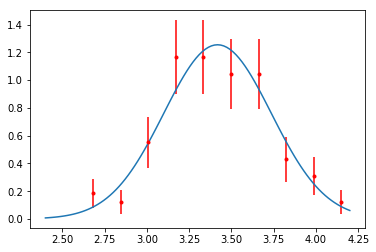

In [32]:
n = scipy.stats.norm.rvs(3.418,0.318,100)
## Draw a histogram which is not normalised
entries1, edges, patches = plt.hist(n, bins=10, histtype='step')
## Draw a histogram which IS normed
entries2, edges, patches = plt.hist(n, bins=10, histtype='step',density=True)
## Close plt so that the previous histograms are not shown
plt.close() 
## Calculate the poisson standard deviation and scale down to second histogram
errors = np.sqrt(entries1) * entries2/entries1
## calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])
## draw errobars, use the sqrt error.
plt.errorbar(bin_centers, entries2, yerr=errors, fmt='r.')
## Draw a normal distribution
x = np.linspace(2.4,4.2,100)
plt.plot(x,scipy.stats.norm.pdf(x,3.418,0.318))
plt.show()

We see that 3 out of 10 data points are more than one standard deviation off the "theory" curve. This is how it should be.

**Box Plots**

Often box plots are used to visually inspect differences between categories. Let's display the setal length of the three Iris categories with bx plots (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html):

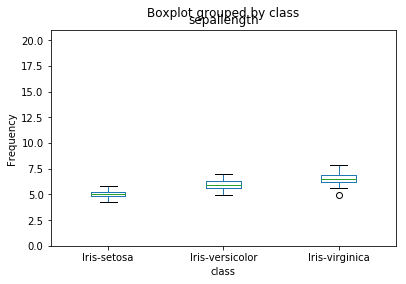

In [34]:
dataframe.boxplot(column=['sepallength'],by='class')
df_setosa['sepallength'].plot(kind="hist",bins=5,fill=False)

**Scatter plots (correlations)**

A visual inspection of correlations between columns is often useful. 

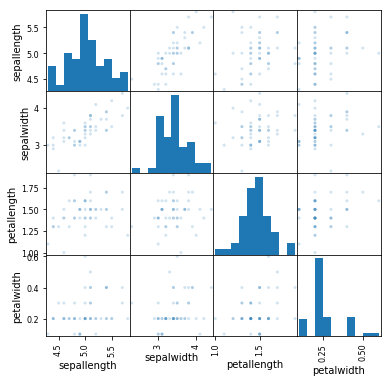

In [35]:
## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html
from pandas.plotting import scatter_matrix
df = dataframe
scatter_matrix(df[df['class']=='Iris-setosa'], alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


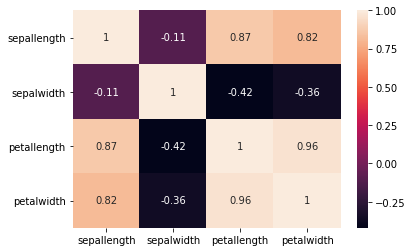

In [36]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
plt.show()

# Annex 1 Probability

An abstract definition of probability can be given by considering a set $S$, called the sample space, and possible subsets $A,B,...$ the interpretation of which is left open. The probability $P$ is a real-valued function defined by the following axioms due to Kolmogorov (1933) [9]:

- For every subset $A$ in $S$, $P(A) ≥ 0$;
- For disjoint subsets (i.e., $A ∩ B = ∅$), $P(A ∪ B) = P(A) + P(B)$; 
- $P(S)=1$.

From this further properties can be derives, e.g.

- $P(\bar{A}) = 1 - P(A)$
- $P(A \cup \bar{A}) = 1$
- $P(\emptyset) = 0$
- if A in B, then $P(A)\leq P(B)$
- $P(A \cup \bar{A}) = P(A) + P(B) - P(A\cap B)$

#### Conditional probability
In addition, one defines the conditional probability $P(A|B)$ (read as $P$ of $A$ given $B$) as $$P(A|B) = \frac{P(A ∩ B)}{P(B)}$$

As an example, when throwing the dice, consider obtaining more than 3 eyes given only trows with even number of eyes outcomes. We calculate the (conditional) probability:

$$P(n>3|n\; even) = \frac{P(n>3 \cap n\; even)}{P(even)} = \frac{2/6}{3/6} = \frac{2}{3}$$

#### Independence

If A and B are independent, then 

$$P(A|B) = \frac{P(A ∩ B)}{P(B)} = \frac{P(A)P(B)}{P(B)} = P(A)$$


### Some words on probability and bayesian versus frequentist statistics

Since data taking is data taking of random variables, we need to define and talk about probability. In mathematichs probability is defined in a rather abstract manner (see Annex below). For our purposes we go directly to the interpreation as either **relative frequency** or **subjective probability**. If A is a possible outcome of an experiment repeated n times, then the probability of A is the realtive frequency

$$P(A) = \lim_{n\rightarrow \infty} \frac{times \; outcome \;is\;A}{n}$$

The subjective probability is

$$ P(A) = degree\;of\;belief\;that \;A \; is\; true$$

Both concepts are consistent with the abstract mathematical definition .

#### Bayes' theorem

From this definition and using the fact that $A ∩ B$ and $B ∩ A$ (intersection) are the same, one obtains
Bayes’ theorem

$$P (A|B) = \frac{P(B|A)P(A)}{P(B)}$$

first published by the Reverend Thomas Bayes (1702-1761). Statistics based on the relative frequency interpretation of probability is called frequentist statistics, on bayesian theorem bayesian statistics.

### Other probability density functions (5 min)

This is just for your reference, no need to understand all these distributions. A quite good free and comprehensive book is here: http://staff.fysik.su.se/~walck/suf9601.pdf. 

**Table 1.4.1** Some common probability density functions, with corresponding characteristic functions and means and variances. In the Table, $\Gamma(k)$ is the gamma function, equal to $(k − 1)!$ when $k$ is an integer; $_1F_1$ is the confluent hypergeometric function of the 1st kind [11].

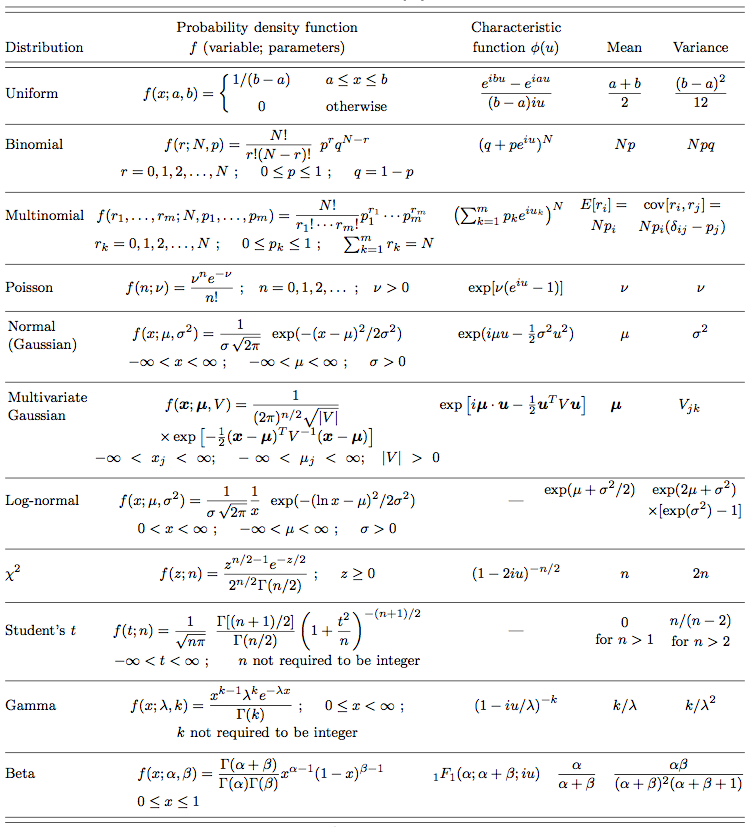

Distributions are either discrete or continuous. To study the distributions we use the statistical functions of scipy.stats (https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html). There you also find more distributions than listed here.